In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl
from sklearn.metrics import r2_score, mean_squared_error

friction_univ = np.linspace(0.1, 0.3, 3)
friction = ctrl.Antecedent(friction_univ, 'friction')
friction.automf(3)

initial_v_univ = np.linspace(1, 5, 3)
initial_v = ctrl.Antecedent(initial_v_univ, 'initial_v')
initial_v.automf(3)

final_x_univ = np.linspace(0.1, 12.8, 7)
final_x = ctrl.Consequent(final_x_univ, 'final_x')
final_x.automf(7)

/home/mario/git/MarioJim/PracticasInteligenciaComp/6_LogicaDifusa/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


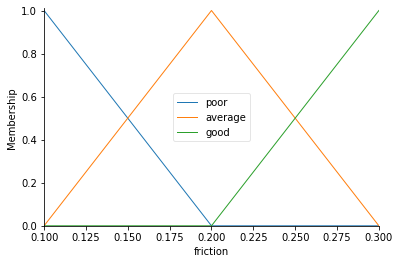

In [3]:
friction.view()

/home/mario/git/MarioJim/PracticasInteligenciaComp/6_LogicaDifusa/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


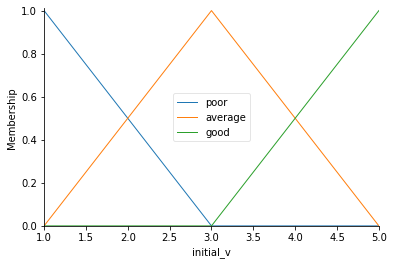

In [4]:
initial_v.view()

/home/mario/git/MarioJim/PracticasInteligenciaComp/6_LogicaDifusa/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


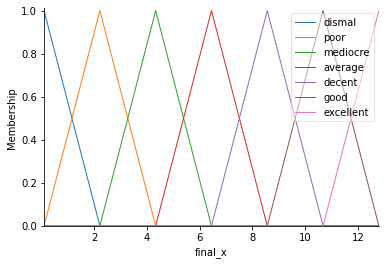

In [5]:
final_x.view()

In [6]:
rules = []
rules.append(ctrl.Rule(initial_v["poor"], final_x["dismal"]))
rules.append(ctrl.Rule(friction["poor"] & initial_v["average"], final_x["mediocre"]))
rules.append(ctrl.Rule(friction["poor"] & initial_v["good"], final_x["excellent"]))
rules.append(ctrl.Rule(friction["average"] & initial_v["average"], final_x["poor"]))
rules.append(ctrl.Rule(friction["average"] & initial_v["good"], final_x["average"]))
rules.append(ctrl.Rule(friction["good"] & initial_v["average"], final_x["poor"]))
rules.append(ctrl.Rule(friction["good"] & initial_v["good"], final_x["mediocre"]))

In [7]:
final_x_ctrl = ctrl.ControlSystem(rules)
final_x_sim = ctrl.ControlSystemSimulation(final_x_ctrl)

R2 0.902261052497299
MSE 1.3075557948458512


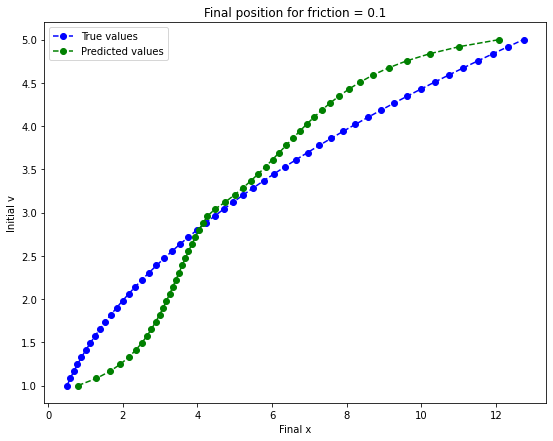

In [8]:
f = 0.1
final_x_sim.input["friction"] = f

vs = np.linspace(1, 5, 50)
x_trues = []
x_preds = []
for v in vs:
    final_x_sim.input["initial_v"] = v
    final_x_sim.compute()
    x_true = v * v / (2 * f * 9.81)
    x_pred = final_x_sim.output["final_x"]
    x_trues.append(x_true)
    x_preds.append(x_pred)

print("R2", r2_score(x_trues, x_preds))
print("MSE", mean_squared_error(x_trues, x_preds))

plt.figure(figsize=(9, 7))
plt.plot(x_trues, vs, "bo--")
plt.plot(x_preds, vs, "go--")
plt.title(f"Final position for friction = {f}")
plt.xlabel("Final x")
plt.ylabel("Initial v")
plt.legend(["True values", "Predicted values"])